# PROBLEM STATEMENT

We are provided with a dataset containing data researchers from the *University of California, Irvine* were donated regarding 23 mushroom species. This dataset includes descriptions of samples corresponding to 23 species of gilled mushrooms in the *Agaricus* and *Lepiota* Family Mushroom drawn from *The Audubon Society Field Guide* to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy.

Here, we aim to create a classification ML model which can predict whether the given mushroom is poisonous or edible based on the provided features.

# Attribute Information

### TARGET VARIABLES
**classes: edible=e, poisonous=p**

### FEATURES
* **cap-shape**: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s

* **cap-surface**: fibrous=f, grooves=g, scaly=y, smooth=s

* **cap-color**: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y

* **bruises**: bruises=t, no=f

* **odor**: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s

* **gill-attachment**: attached=a, descending=d, free=f, notched=n

* **gill-spacing**: close=c, crowded=w, distant=d

* **gill-size**: broad=b, narrow=n

* **gill-color**: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y

* **stalk-shape**: enlarging=e, tapering=t

* **stalk-root**: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?

* **stalk-surface-above-ring**: fibrous=f, scaly=y, silky=k, smooth=s

* **stalk-surface-below-ring**: fibrous=f, scaly=y, silky=k, smooth=s

* **stalk-color-above-ring**: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y

* **stalk-color-below-ring**: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y

* **veil-type**: partial=p, universal=u

* **veil-color**: brown=n, orange=o, white=w, yellow=y

* **ring-number**: none=n, one=o, two=t

* **ring-type**: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z

* **spore-print-color**: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y

* **population**: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y

* **habitat**: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

# LOADING DATA AND RELEVANT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#LOADING THE DATASET AND CHECKING ITS SHAPE
df = pd.read_csv('mushrooms ML.csv')
df.shape

(8124, 23)

# EXPLORATORY DATA ANALYSIS

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [5]:
#CHECKING FOR NULL VALUES

df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
#CHECKING DATATYPES OF COLUMNS

df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [7]:
#MOVING CLASS COLUMN TO LAST POSITION

df = df[[col for col in df.columns if col != 'class']+['class']]
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


# DATA ENCODING

To create a heatmap to check the correlation between the features and target, we have to first encode the dataset into numerical form. So we will create a copy of the dataframe **df**.

In [8]:
newdf = df.copy() # COPY CREATED
cols = newdf.columns # GETTING NAMES OF COLUMNS

from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
for i in cols:
    newdf[i] = encode.fit_transform(newdf[i]) #ENCODING ALL COLUMNS
newdf.sample(10)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
6833,2,2,2,0,2,1,0,1,0,1,...,6,7,0,2,1,0,7,4,2,1
5343,2,3,9,0,2,1,0,0,3,0,...,6,0,0,2,1,2,1,5,4,1
3310,2,3,2,1,5,1,0,0,5,1,...,6,7,0,2,1,4,3,4,0,0
5952,2,3,9,0,2,1,0,0,2,0,...,4,6,0,2,1,2,1,4,1,1
6282,5,3,2,0,2,1,0,1,0,1,...,7,6,0,2,1,0,7,4,0,1
664,0,2,8,1,3,1,0,0,2,0,...,7,7,0,2,1,4,3,3,1,0
4294,2,0,3,0,2,1,0,0,3,0,...,0,4,0,2,1,2,1,5,4,1
916,5,2,8,1,3,1,0,0,5,0,...,7,7,0,2,1,4,3,3,3,0
3705,2,0,2,1,5,1,0,0,9,1,...,7,3,0,2,1,4,3,5,0,0
3710,5,0,3,0,2,1,0,0,7,0,...,4,0,0,2,1,2,1,4,0,1


## CHECKING THE CORRELATION BETWEEN TARGET AND FEATURES USING A HEAT MAP

<AxesSubplot:>

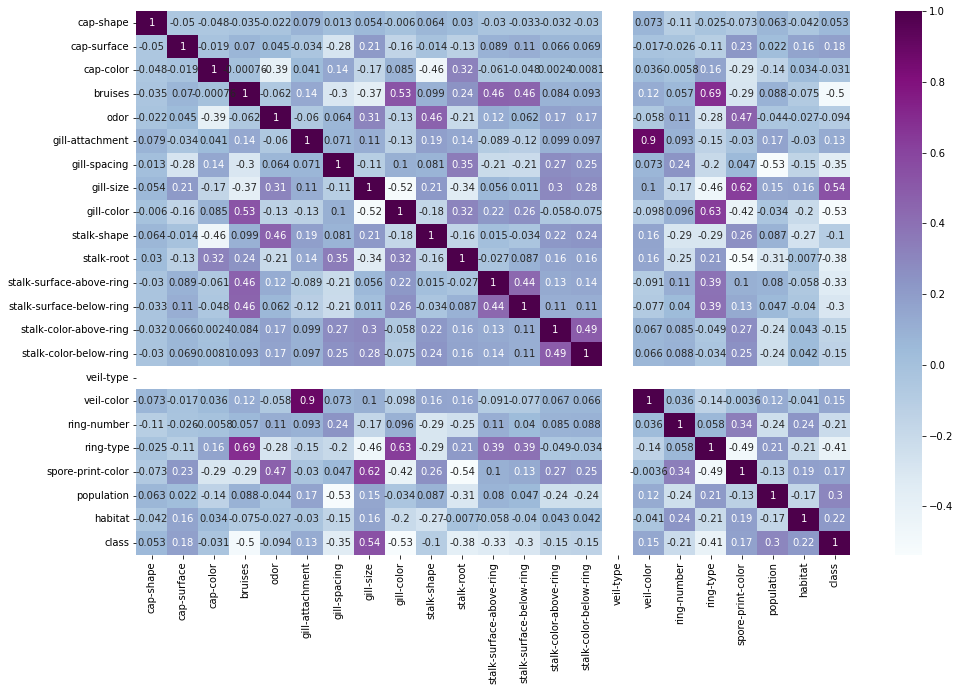

In [9]:
plt.figure(figsize = (16,10))
sns.heatmap(data = newdf.corr(), cmap = 'BuPu', annot = True)

In the above heatmap, we can see that target variable **class** is closely correlated with:
* **gill-attachment**,
* **cap-surface**,
* **gill-size**,
* **veil-color**,
* **spore-print-color**,
* **population** &
* **habitat**.

Let us plot the above columns in countplots and study the amount of poisonous and edible types in each category.

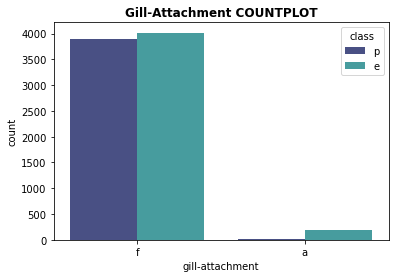

In [10]:
sns.countplot(x = df['gill-attachment'],
              palette= 'mako',hue = df['class']).set_title('Gill-Attachment COUNTPLOT',weight = 'bold')
plt.show()

As seen here, there are two types of gill attachments present in our data: free (f) and attached (a).
Free gill-attachments are much larger in number as compared to attached. Free contains almost the same amount of poisonous and edible mushrooms meanwhile attached ones have more edible ones.

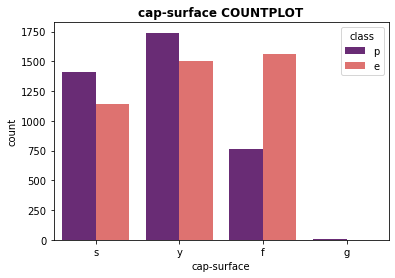

In [11]:
sns.countplot(x = df['cap-surface'],palette= 'magma',hue = df['class']).set_title('cap-surface COUNTPLOT',weight = 'bold')
plt.show()

* Fibrous (f) caps have the highest poisonous to edible ratio, half of the all fibrous are edible.
* Smooth (s), scaly (y) and grooved (g) all have more poisonous than edible mushrooms.
* Scaly mushrooms have the most poisonous varieties followed by smooth caps.
* There are bery little grooved cap surfaces observed and most of them are poisonous.

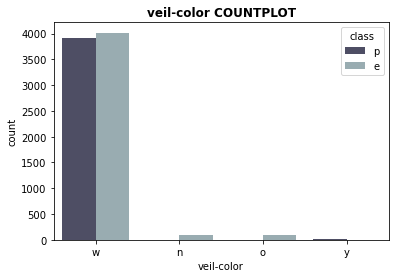

In [12]:
sns.countplot(x = df['veil-color'], palette= 'bone', hue = df['class']).set_title('veil-color COUNTPLOT',weight = 'bold')
plt.show()

* White (w) veiled mushrooms are the most common here and both have almost equal amount of poisonous & edible types.
* Brown (n), orange (o) coloured veil mushrooms have very little poisonous types. Both also have a small but appreciable amount of edible mushrooms.
* Yellow (y) veiled mushrooms have almost no edible ypes but a little number of poisonous types.

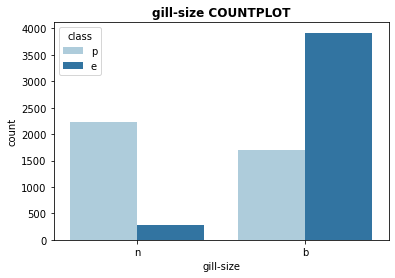

In [13]:
sns.countplot(x = df['gill-size'], palette= 'Paired', hue = df['class']).set_title('gill-size COUNTPLOT',weight = 'bold')
plt.show()

* Broad (b) gilled mushrooms are greater in amount than narrow (n) ones.
* Narrow gilled mushrooms have a disproportionately large number of poisonous types (>2000) than edible types (<500).
* Poisonous Broad gilled mushrooms have less than half in number of the edible type (approximately 4000).

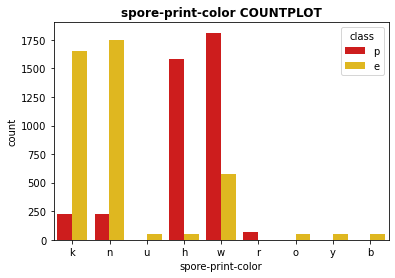

In [14]:
sns.countplot(x = df['spore-print-color'],
              palette= 'hot', hue = df['class']).set_title('spore-print-color COUNTPLOT',weight = 'bold')
plt.show()

* In descending order, white (w), brown (n), black (k) and chocolate (h) spore prints have the highest number of samples.
* White has around 600 edible mushrooms and over 1750 poisonous mushrooms.
* Approximately 1750 brown spore print mushrooms are edible and <250 are poisonous.
* Black spore prints have around 1600 edible and <250 poisonous mushrooms.
* Chocolate coloured spore print mushrooms are mostly poisonous (between 1500 and 1750) and less than 200 of them are of the edible variety.

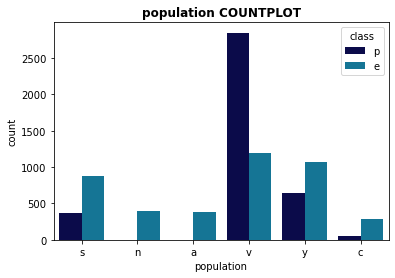

In [15]:
sns.countplot(x = df['population'], palette= 'ocean', hue = df['class']).set_title('population COUNTPLOT',weight = 'bold')
plt.show()

* Several (v) type of population sits at the top of this statistic with over 2500 poisonous and circa 1250 edible types of mushrooms.
* Next are solitary (y) type with little over 1000 edible and about 750 poisonous types.
* Scattered (s) mushrooms come third. They have almost 1000 edible and around 400 poisonous types.
* Clustered (c) have only approximately 250 edible and less than 100 poisonous.
* Abundant (a) and numerous (n) populations have littleto no poisonous types and almost 500 edible type mushrooms.

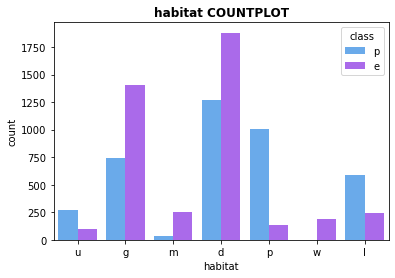

In [16]:
sns.countplot(x = df['habitat'], palette= 'cool', hue = df['class']).set_title('habitat COUNTPLOT',weight = 'bold')
plt.show()

* Woods (d) have the highest amount of mushrooms as compared to all other habitats. They have about 1250 poisonous and over 1750 edible types.
* Grasses (g) are the second most common habitat for mushrooms. Around 1450 edible and 750 edible.
* Paths (p) have 1000 poisonous samples and only around 100 edible samples along them.
* In the leafy habitat (l) more than 500 poisonous and 250 edible mushrooms grow.
* Exactly 250 poisonous and around 100 edible mushrooms grow in Urban habitats (u).
* Meadows (m) have the least number of mushrooms. Very little poisonous types and approximately 250 edible ones.

## What percentage of mushrooms in the data are edible or poisonous?

In [17]:
cat_count = list(df['class'].value_counts()) #getting values
cat_names = ['Edible','Poisonous'] #getting category names

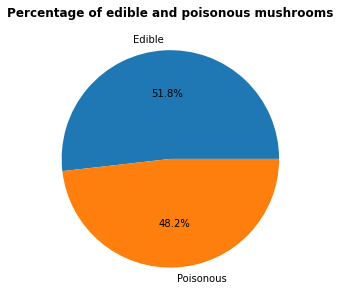

In [18]:
plt.figure(figsize=(5,5))
plt.title('Percentage of edible and poisonous mushrooms',weight='heavy') #set title
plt.pie(cat_count,labels=cat_names,autopct="%.1f%%") #displaying data labels
plt.show()

As seen in the above pie chart, *51.8%* of the total mushrooms in the given data are edible and *48.2%* are poisonous. Thus, there appears to be an almost half-hslf split between the types in the data collected by the researchers at *UCI*.

# SPLITTING THE DATASET

In [19]:
from sklearn.model_selection import train_test_split #IMPORTING LIBRARIES

x = newdf.drop(columns=['class'])  #SPLITTING INTO TARGET AND FEATURES
y = newdf['class']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.70, random_state= 5) #SPLIT INTO TRAIN AND TEST SETS

print("samples in xtrain = ",xtrain.shape[0])
print("samples in xtest = ",xtest.shape[0])
# PRINT THE NUMBER OF DATA POINTS IN EACH SET

samples in xtrain =  5686
samples in xtest =  2438


# CREATING THE CLASSIFICATION MODEL

All classification machine learning models were tested for this data-set. All of them provide supreme results of almost a **100% accuracy, precision and recall scores**.
To hence decide upon the most efficient ofall models, we import the **time** package and use the **time()** function within it to find the total time consumed by the algorithm to predict trainging and testing datasets.

**ADABOOSTING** model provided us with the least amount of time required and therefore, is the most efficient of them all.

In [20]:
#ADABOOSTING

import time                                      #IMPORT TIME PACKAGE
from sklearn.ensemble import AdaBoostClassifier  # IMPORTING ADABOOSTINGCLASSIFIER FROM SKLEARN.ENSEMBLE

model = AdaBoostClassifier() #OBJECT MADE
model.fit(xtrain,ytrain)     #TRAINING THE MODEL

start_time = time.time()          #GETTING START TIME
trainpred = model.predict(xtrain) #MODEL MAKES PREDICTIONS USING TRAINING DATA
end_time = time.time()            #GETTING THE END TIME
trainpred[:10] #DISPLAY THE FIRST 10 VALUES PREDICTED

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2976
           1       1.00      1.00      1.00      2710

    accuracy                           1.00      5686
   macro avg       1.00      1.00      1.00      5686
weighted avg       1.00      1.00      1.00      5686



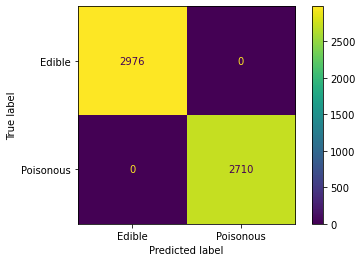

Time taken for Adaboosting algorithm to make predictions:  0.031255245208740234 seconds.


In [21]:
from sklearn import metrics
from sklearn.metrics import classification_report #IMPORTING RELEVANTLIBRARIES TO EVALUATE THE TRAINED MODEL

print(classification_report(ytrain,trainpred)) #PRINT CLASSIFICATION SCORES

cm = metrics.confusion_matrix(ytrain,trainpred)
cmdisplay = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = ['Edible','Poisonous'])
cmdisplay.plot()
plt.show()           #CREATE AND PRINT CONFUSION MATRIX BASED ON PREDICTED VALUES

print('Time taken for Adaboosting algorithm to make predictions: ',end_time-start_time,'seconds.')

* As seen above, the model gives us 100% score for **precision, recall, f1-score**.
* Furthermore, the confusion matrix also shows us that not a single error has been made.
* The model takes only 0.0312 seconds to predict the values.

Now, we move on to run the testing data to evaluate the model's performance with a different dataset.

In [22]:
#RUNNING TEST DATA

import time             #IMPORTING TIME FUNCTION

start_time = time.time()       # GET START TIME
testpred = model.predict(xtest)  #MAKE PREDICTIONS USING TEST DATA
end_time = time.time()         #GET END TIME

testpred[:10] #DISPLAY FIRST 10 PREDICTIONS

array([1, 1, 1, 0, 0, 1, 0, 0, 1, 1])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1232
           1       1.00      1.00      1.00      1206

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



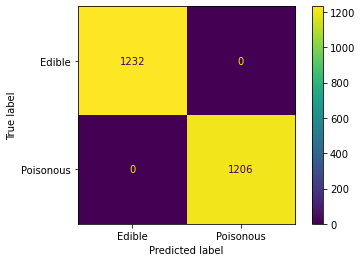

Time taken for algorithm to make predictions:  0.032160282135009766 seconds.


In [23]:
from sklearn import metrics
from sklearn.metrics import classification_report

print(classification_report(ytest,testpred)) #PRINTING CLASSIFICATION REPORT

cm = metrics.confusion_matrix(ytest,testpred)
cmdisplay = metrics.ConfusionMatrixDisplay(confusion_matrix= cm,display_labels= ['Edible','Poisonous'])
cmdisplay.plot()
plt.show() #CREATE AND DISPLAY ITSCONFUSION MATRIX

print('Time taken for algorithm to make predictions: ',end_time-start_time,'seconds.') #PRINT TIME TAKEN TO PREDICT

* Here again, the model gives us perfect performance, which shows it was not overfitting.
* Not a single false positive or negative was made.
* for testing data, the model took only 0.0318 seconds.

This time score is the best among all other classification models, and hence Adaboosting is the best course of action to be taken here.